In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [14]:
%matplotlib inline

UsageError: Line magic function `%seaborn` not found.


In [ ]:
df = pd.read_csv("downloads/student-mat.csv",sep=";")

In [58]:
print(df.describe()) # understanding the data

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278

In [16]:
df[df.isnull()].count() #checking if any null data is present

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

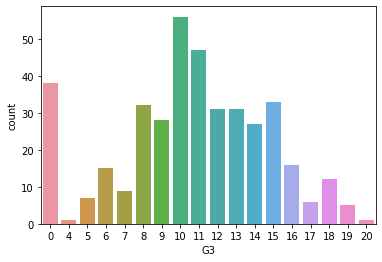

In [25]:
#Distribution of marks 
sns.countplot(df['G3'])
#There are a lot of 0 than expected

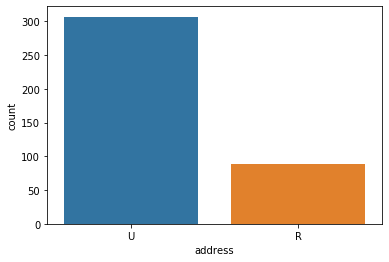

In [28]:
sns.countplot('address',data=df)#More students are from urban background

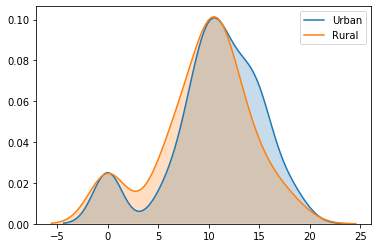

In [41]:
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
#There are more top scorers from urban compared to rural. But cannot be considered due to biased dataset (contains less people from rural)

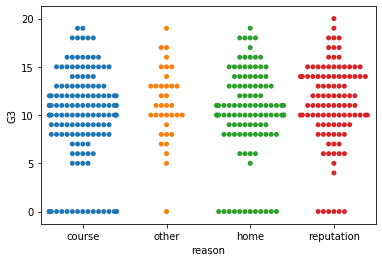

In [44]:
sns.swarmplot(x='reason',y='G3',data=df)

In [88]:
#Replacing categorical variables and finding correlation
modified_df = pd.get_dummies(df)
modified_df.corr()['G3'].abs().sort_values()[-12:-1]
# The final values depends primarily on G2,G1, highers_opted,relationship,failures,traveltime(lookbelow),mother and father education,go_out

romantic_yes    0.129970
romantic_no     0.129970
goout           0.132791
Fedu            0.152457
age             0.161579
higher_no       0.182465
higher_yes      0.182465
Medu            0.217147
failures        0.360415
G1              0.801468
G2              0.904868
Name: G3, dtype: float64

In [86]:
df.corr()['G3'].abs().sort_values(ascending=False)[:12]


G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Name: G3, dtype: float64

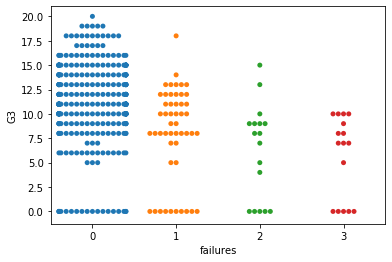

In [62]:
sns.swarmplot(x='failures',y='G3',data=df) # Clearly it is dependent on the number of past failures

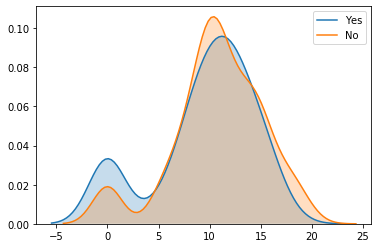

In [69]:
sns.kdeplot(df.loc[df['romantic'] == 'yes', 'G3'], label='Yes', shade = True)
sns.kdeplot(df.loc[df['romantic'] == 'no', 'G3'], label='No', shade = True)
#People in a relationship tend to score more marks than people not in relationship

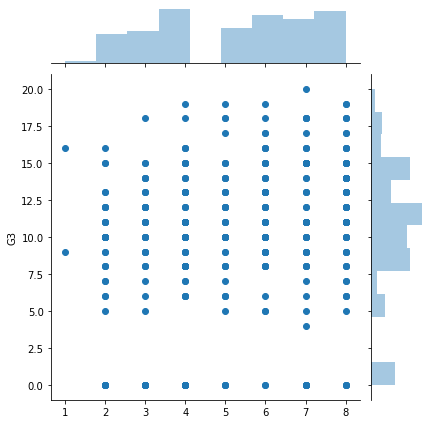

In [102]:
sns.jointplot(x= df['Medu']+df['Fedu'] ,y=df['G3'],data=modified_df)#there is no significance between mother and father's education

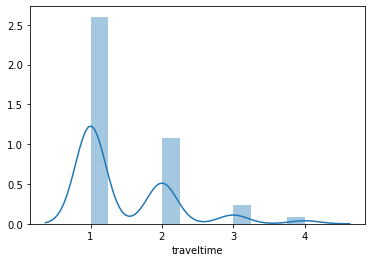

In [106]:
sns.distplot(df['traveltime'])#more than 50 percent of the students live near their schools

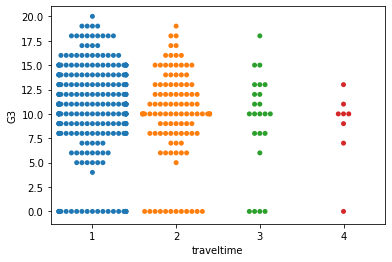

In [110]:
sns.swarmplot(x='traveltime',y='G3',data=df) #No significant impact

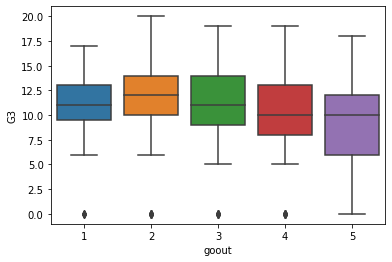

In [138]:
sns.boxplot(x='goout',y='G3',data=df)# students with less going out time score more

In [128]:
#prediction if a student will pass or fail using SVM
#if marks<10 fail;if marks>=10 pass
def marks(a):
    if a>=10:
        return 1
    else:
        return 0
modified_df['G3'] = modified_df['G3'].apply(marks)

In [132]:
modified_df['G3'].value_counts() # The data is more biased towards passing students

1    265
0    130
Name: G3, dtype: int64

In [158]:
df[(df['G3']==0)]#all of their absence is zero

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


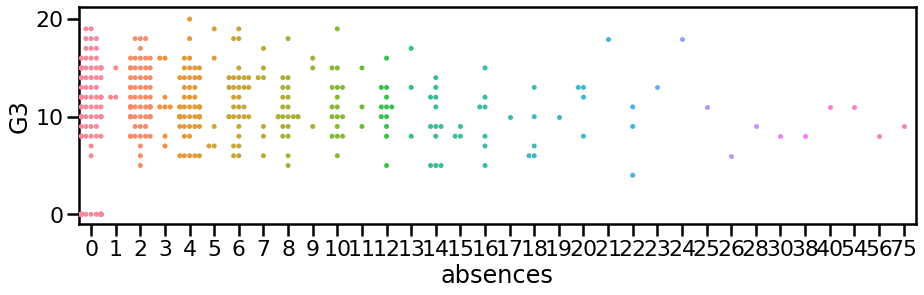

In [179]:
#initially we saw a lot of zeroes. They must be removed from the data
plt.figure(figsize=(15,4))
c = sns.swarmplot(x='absences',y='G3',data=df)
plt.show()

In [180]:
df.drop(df[df['G3']==0].index,inplace=True)

In [184]:
df[df['G3']==0]['G3'].count()#cheking if properly removed

0

In [186]:
#also replacing modified df
modified_df = pd.get_dummies(df)
modified_df['G3'] = modified_df['G3'].apply(marks)

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import svm

In [204]:
X = modified_df[['G2','G1','goout','romantic_yes','romantic_no','higher_yes','higher_no']]
y = modified_df['G3']

In [208]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [209]:
classifier  = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)
predict = classifier.predict(X_test)
confusion_matrix(y_test,predict)

array([[19,  4],
       [ 6, 79]], dtype=int64)

In [213]:
print(classification_report(y_test,predict))#i have no idea why it is not aligned properly

precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.95      0.93      0.94        85

    accuracy                           0.91       108
   macro avg       0.86      0.88      0.87       108
weighted avg       0.91      0.91      0.91       108

